# Creating a map in basemap and plotting data on it

There are two (plus infinite) common ways of plotting data on a map, as scatter points, and as a heat map. We will start with scatter points from the ANSS earthquake catalog. Then we will plot as heat map.

If you haven't already downloaded the ANSS catalog you can do so from [here](http://www.quake.geo.berkeley.edu/anss/catalog-search.html).

Then we can import it into pandas.

In [1]:
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/anss.csv', delim_whitespace=True)

Let's look at the data.

In [3]:
df.head()

,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,Event,ID
0,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997/01/01,04:35:51.88,6.813,-72.894,163.7,5.3,Mw,150.0,1.10,NEI,1.997010e+11,NaN,NaN,NaN
2,1997/01/01,22:32:32.30,-0.127,123.823,115.4,5.8,Me,178.0,1.01,NEI,1.997010e+11,NaN,NaN,NaN
3,1997/01/01,22:43:32.31,-5.977,129.665,177.0,5.0,Mb,31.0,0.77,NEI,1.997010e+11,NaN,NaN,NaN
4,1997/01/02,02:57:51.65,-23.860,-179.870,500.0,5.4,Mw,107.0,0.91,NEI,1.997010e+11,NaN,NaN,NaN


Hmmm. What's that first line about (index=0)? 

If you open up the <i>anss.csv</i> file in another program, you will see that second line in the file is a line of dashes. 

Let's remove that line.

In [4]:
df = df[df.index>=1] # keep rows from index 1 until the end
df.head()

,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,Event,ID
1,1997/01/01,04:35:51.88,6.813,-72.894,163.7,5.3,Mw,150.0,1.10,NEI,1.997010e+11,NaN,NaN,NaN
2,1997/01/01,22:32:32.30,-0.127,123.823,115.4,5.8,Me,178.0,1.01,NEI,1.997010e+11,NaN,NaN,NaN
3,1997/01/01,22:43:32.31,-5.977,129.665,177.0,5.0,Mb,31.0,0.77,NEI,1.997010e+11,NaN,NaN,NaN
4,1997/01/02,02:57:51.65,-23.860,-179.870,500.0,5.4,Mw,107.0,0.91,NEI,1.997010e+11,NaN,NaN,NaN
5,1997/01/02,10:52:35.03,10.568,92.742,33.0,5.1,Mb,117.0,0.95,NEI,1.997010e+11,NaN,NaN,NaN


That's better! Let's get some brief info about our catalog.

In [5]:
df.describe()

,Lat,Lon,Depth,Mag,Nst,RMS,Event,ID
count,20835.000000,20835.000000,20835.000000,20835.000000,20835.000000,2.071000e+04,3.400000e+01,0.0
mean,1.175284,43.176381,59.520817,5.379757,155.590353,1.996423e+11,1.588324e+07,NaN
std,29.037107,121.061153,103.214783,0.420100,125.361223,1.220162e+10,1.609338e+07,NaN
min,-67.139000,-180.000000,-5.000000,5.000000,0.000000,4.000000e-02,1.129580e+05,NaN
25%,-17.739000,-71.425000,10.000000,5.100000,63.000000,2.001022e+11,1.232457e+06,NaN
50%,-3.068000,97.731000,33.000000,5.300000,117.000000,2.004121e+11,5.793165e+06,NaN
75%,21.548000,142.606000,48.800000,5.500000,211.000000,2.007072e+11,2.802485e+07,NaN
max,86.283000,179.998000,691.600000,9.000000,929.000000,2.009123e+11,5.118347e+07,NaN


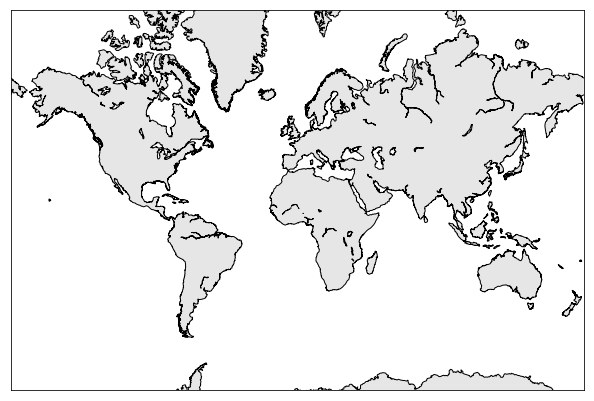

In [6]:
# see comments for break down of each piece

# plt.subplots returns a fig and axes objects
# the fig is the canvas that all plots go in
# ax is the particular plot you are want to plot in. right now this isn't important but it will
# become important when you want to have more than one plot
fig, ax = plt.subplots(1, figsize=(15,7))

m = Basemap(projection='merc', # the projection you want to use, many are supported, this one is mercator
        llcrnrlat=-70.         # the LOWER LEFT corner of latitude
        , urcrnrlat=80.        # the UPPER RIGHT corner of latitude
        , llcrnrlon=-180.      # the LOWER LEFT corner of longitude
        , urcrnrlon=180.       # the UPPER RIGHT corner of longitude
        , resolution='l'       # the level of resolution to render the drawings, see documentation for more details
        , area_thresh=10000    # the area, in meters, to not plot things 
                               # (so if an island is less than 10k meters it won't be plotted)
        , ax=ax)               # the axes object to plot on that was created previously

m.drawcoastlines()             
m.fillcontinents(color='0.9'   # in matplotlib grayscale can be defined by a number between 0 and 1
                 , lake_color='white' # color can also be a name
                 , zorder=0)   # zorder is the layer which to draw.
                      

Basemap actually isn't doing the plotting as much as it is telling matplotlib what to plot. Basemap does the converting of geographic coordinates into a cartesian system matplotlib understands, and the fractal creation of coastlines for matplotlib to plot.

This map is sort of boring though, we should add some earthquakes to it.

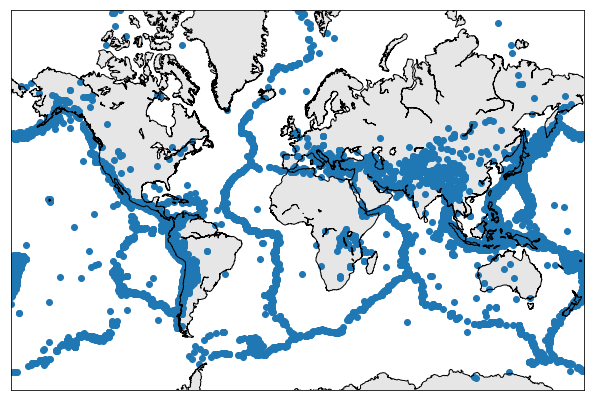

In [7]:
# see comments for break down of each piece

# plt.subplots returns a fig and axes objects
# the fig is the canvas that all plots go in
# ax is the particular plot you are want to plot in. right now this isn't important but it will
# become important when you want to have more than one plot
fig, ax = plt.subplots(1, figsize=(15,7))

m = Basemap(projection='merc', # the projection you want to use, many are supported, this one is mercator
        llcrnrlat=-70.         # the LOWER LEFT corner of latitude
        , urcrnrlat=80.        # the UPPER RIGHT corner of latitude
        , llcrnrlon=-180.      # the LOWER LEFT corner of longitude
        , urcrnrlon=180.       # the UPPER RIGHT corner of longitude
        , resolution='l'       # the level of resolution to render the drawings, see documentation for more details
        , area_thresh=10000    # the area, in meters, to not plot things 
                               # (so if an island is less than 10k meters it won't be plotted)
        , ax=ax)               # the axes object to plot on that was created previously

m.drawcoastlines()             
m.fillcontinents(color='0.9'   # in matplotlib grayscale can be defined by a number between 0 and 1
                 , lake_color='white' # color can also be a name
                 , zorder=0)   # zorder is the layer which to draw.

x, y = m(df.Lon.values, df.Lat.values) # Converts geographic coordinates to cartesian coordinates

ax.scatter(x, y) # plot on the axes the datas

# That is a good looking map, but we have some more data we can add

We know the depth and we know the magnitude. We can set the size to be the magnitude and the color to be the depth!

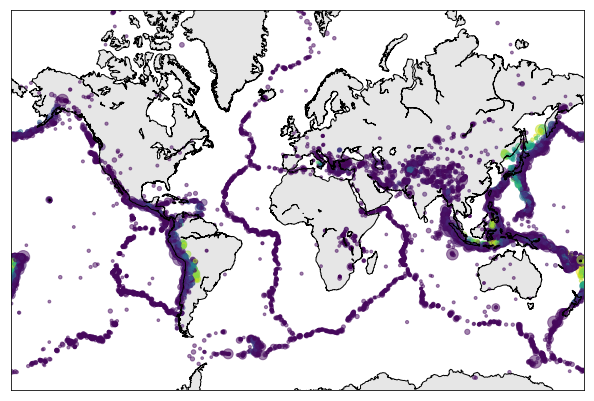

In [8]:
# see comments for break down of each piece

# plt.subplots returns a fig and axes objects
# the fig is the canvas that all plots go in
# ax is the particular plot you are want to plot in. right now this isn't important but it will
# become important when you want to have more than one plot
fig, ax = plt.subplots(1, figsize=(15,7))

m = Basemap(projection='merc', # the projection you want to use, many are supported, this one is mercator
        llcrnrlat=-70.         # the LOWER LEFT corner of latitude
        , urcrnrlat=80.        # the UPPER RIGHT corner of latitude
        , llcrnrlon=-180.      # the LOWER LEFT corner of longitude
        , urcrnrlon=180.       # the UPPER RIGHT corner of longitude
        , resolution='l'       # the level of resolution to render the drawings, see documentation for more details
        , area_thresh=10000    # the area, in meters, to not plot things 
                               # (so if an island is less than 10k meters it won't be plotted)
        , ax=ax)               # the axes object to plot on that was created previously

m.drawcoastlines()             
m.fillcontinents(color='0.9'   # in matplotlib grayscale can be defined by a number between 0 and 1
                 , lake_color='white' # color can also be a name
                 , zorder=0)   # zorder is the layer which to draw.

x, y = m(df.Lon.values, df.Lat.values) # Converts geographic coordinates to cartesian coordinates

ax.scatter(x, y, s=0.05*np.exp(df.Mag.values), c=df.Depth.values, alpha=0.5) # plot on the axes the datas

# THIS IS BETTER, but not best

While the colors are cool we still would like to know what they mean. For this we need a color bar. It would also be nice to have a scale that shows what the magnitude to circle size actually is.

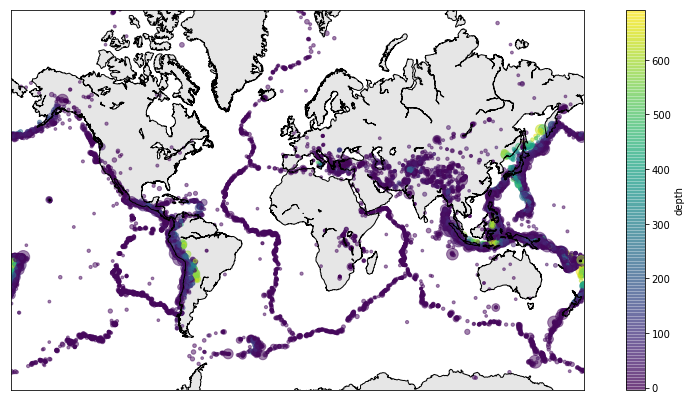

In [9]:
# see comments for break down of each piece

# plt.subplots returns a fig and axes objects
# the fig is the canvas that all plots go in
# ax is the particular plot you are want to plot in. right now this isn't important but it will
# become important when you want to have more than one plot
fig, ax = plt.subplots(1, figsize=(15,7))

m = Basemap(projection='merc', # the projection you want to use, many are supported, this one is mercator
        llcrnrlat=-70.         # the LOWER LEFT corner of latitude
        , urcrnrlat=80.        # the UPPER RIGHT corner of latitude
        , llcrnrlon=-180.      # the LOWER LEFT corner of longitude
        , urcrnrlon=180.       # the UPPER RIGHT corner of longitude
        , resolution='l'       # the level of resolution to render the drawings, see documentation for more details
        , area_thresh=10000    # the area, in meters, to not plot things 
                               # (so if an island is less than 10k meters it won't be plotted)
        , ax=ax)               # the axes object to plot on that was created previously

m.drawcoastlines()             
m.fillcontinents(color='0.9'   # in matplotlib grayscale can be defined by a number between 0 and 1
                 , lake_color='white' # color can also be a name
                 , zorder=0)   # zorder is the layer which to draw.

x, y = m(df.Lon.values, df.Lat.values) # Converts geographic coordinates to cartesian coordinates

cbar = ax.scatter(x, y, s=0.05*np.exp(df.Mag.values), c=df.Depth.values, alpha=0.5) # plot on the axes the datas
fig.colorbar(cbar, label='depth')

# Making plots is cool but already we can start having questions (that have probably already been answered) just from this plot

* Why don't extensional environments have large earthquakes?
* What causes earthquakes in the middle of the pacific plate in Hawaii?
* Why do some subduction zones have big earthquakes and others don't?
* Do all these earthquakes happen at once? When do the big ones occur in relation to the little ones?
* Since earthquakes don't happen homogeneously in space (i.e. there isn't an equal probability of earthquakes happening anywhere on earth), does the distribution for a small region with earthquakes look like a distribution for all of earth?

Maybe these questions are dumb but they are a start and we can't answer them all just with this data set but we can explore, maybe, the last one or two.

To start with, we need to fix some problems with the way the ANSS catalog comes. First, the date is in two separate columns. Let's combine that into one column called timestamp.

In [10]:
df['timestamp'] = df.Date + ' ' + df.Time

In [11]:
df.head()

,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,Event,ID,timestamp
1,1997/01/01,04:35:51.88,6.813,-72.894,163.7,5.3,Mw,150.0,1.10,NEI,1.997010e+11,NaN,NaN,NaN,1997/01/01 04:35:51.88
2,1997/01/01,22:32:32.30,-0.127,123.823,115.4,5.8,Me,178.0,1.01,NEI,1.997010e+11,NaN,NaN,NaN,1997/01/01 22:32:32.30
3,1997/01/01,22:43:32.31,-5.977,129.665,177.0,5.0,Mb,31.0,0.77,NEI,1.997010e+11,NaN,NaN,NaN,1997/01/01 22:43:32.31
4,1997/01/02,02:57:51.65,-23.860,-179.870,500.0,5.4,Mw,107.0,0.91,NEI,1.997010e+11,NaN,NaN,NaN,1997/01/02 02:57:51.65
5,1997/01/02,10:52:35.03,10.568,92.742,33.0,5.1,Mb,117.0,0.95,NEI,1.997010e+11,NaN,NaN,NaN,1997/01/02 10:52:35.03


In [12]:
df.timestamp.dtype

dtype('O')

# Because we know secrets of pandas, we know we want the timestamp to be a numpy.datetime64 type and not an object type

(remember from previous lessons, if we set the index using a datetime then we can have cool plots happen automagically)

Thus we can change it with pandas magic:

In [13]:
df['timestamp'] = pd.to_datetime(df.timestamp)

In [14]:
df.timestamp.dtype

dtype('<M8[ns]')

In [15]:
df = df.set_index(pd.DatetimeIndex(df.timestamp))

In [16]:
df.head()

,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,Event,ID,timestamp
timestamp,,,,,,,,,,,,,,,
1997-01-01 04:35:51.880,1997/01/01,04:35:51.88,6.813,-72.894,163.7,5.3,Mw,150.0,1.10,NEI,1.997010e+11,NaN,NaN,NaN,1997-01-01 04:35:51.880
1997-01-01 22:32:32.300,1997/01/01,22:32:32.30,-0.127,123.823,115.4,5.8,Me,178.0,1.01,NEI,1.997010e+11,NaN,NaN,NaN,1997-01-01 22:32:32.300
1997-01-01 22:43:32.310,1997/01/01,22:43:32.31,-5.977,129.665,177.0,5.0,Mb,31.0,0.77,NEI,1.997010e+11,NaN,NaN,NaN,1997-01-01 22:43:32.310
1997-01-02 02:57:51.650,1997/01/02,02:57:51.65,-23.860,-179.870,500.0,5.4,Mw,107.0,0.91,NEI,1.997010e+11,NaN,NaN,NaN,1997-01-02 02:57:51.650
1997-01-02 10:52:35.030,1997/01/02,10:52:35.03,10.568,92.742,33.0,5.1,Mb,117.0,0.95,NEI,1.997010e+11,NaN,NaN,NaN,1997-01-02 10:52:35.030


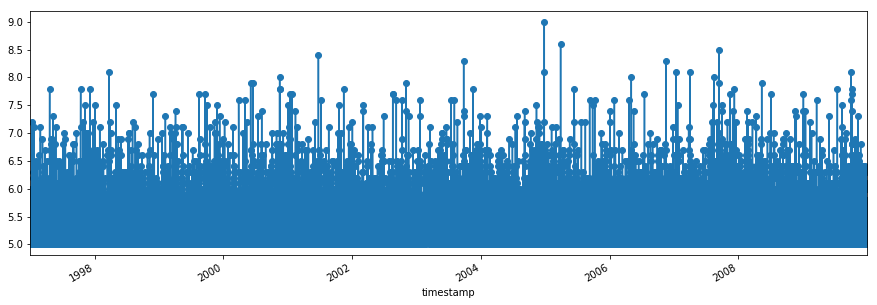

In [17]:
fig, ax = plt.subplots(1, figsize=(15,5))
df.Mag.plot(marker='o', ax=ax)

Already we can see that not all earthquakes happen at once (obviously) but this gives us a good cross-section of earthquakes over the time frame we have data for. But that brings up the question, does the rate of earthquakes change when big earthquakes (>7.0Mw) occur?

For this it is a good time to have more than one plot!

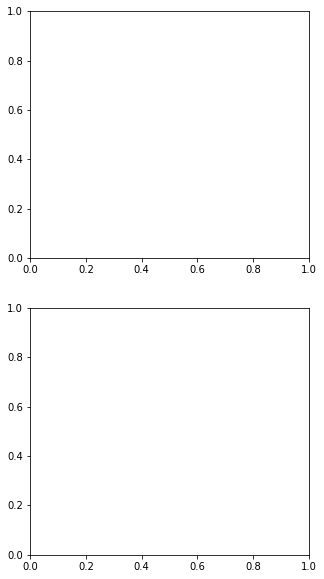

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(5,10))

A few things to note here, the axes are now being returned as an iterable (lots of python knowledge needed to understand that statement). We can define the number of columns and rows of plots using `ncols` and `nrows` but if we want different shapes of plots altogether we will need to use something different called `GridSpec` which we won't discuss here. But know it exists.

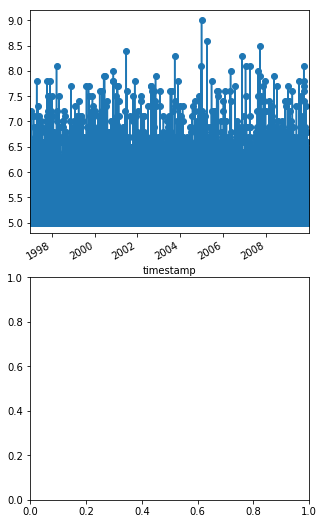

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(5,10))
df.Mag.plot(marker='o', ax=ax1)

As you can see, nothing changes from before except for now we have two plots created with `plt.subplots` instead of one. Plotting data on the plots is exactly the same.

Let's first create the bottom plot separately than put everything back together.

What we want is the cumulative count of earthquakes. Cumulative counts are good ways to see when the rate of an activity changes. We did this before when we created the Gutenburg-Richter exercise but it might not have been obvious, lets do it again.

In [20]:
df.shape

(20835, 15)

In [21]:
earthquake_happened = np.ones_like(np.arange(df.shape[0]))
earthquake_happened

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
eq_cumulative_count = np.cumsum(earthquake_happened)
eq_cumulative_count

array([    1,     2,     3, ..., 20833, 20834, 20835])

In [23]:
df_cumulative = pd.DataFrame(eq_cumulative_count, columns=['count of earthquakes'])
df_cumulative.index = df.index
df_cumulative.head()

,count of earthquakes
timestamp,
1997-01-01 04:35:51.880,1
1997-01-01 22:32:32.300,2
1997-01-01 22:43:32.310,3
1997-01-02 02:57:51.650,4
1997-01-02 10:52:35.030,5


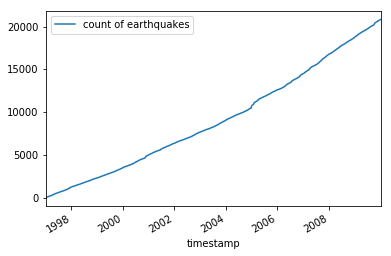

In [24]:
df_cumulative.plot()

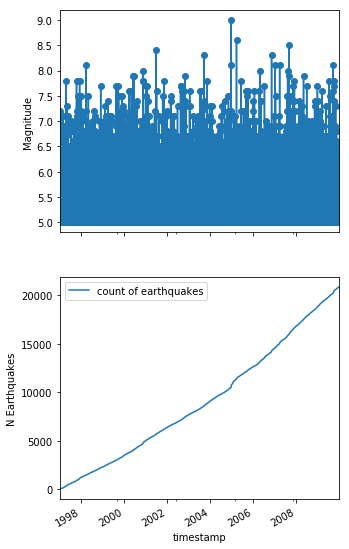

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(5,10), sharex=True)
df.Mag.plot(marker='o', ax=ax1)
df_cumulative.plot(ax=ax2)

ax1.set_ylabel('Magnitude')
ax2.set_ylabel('N Earthquakes')

We can see that there is a big change in the rate of earthquakes at the end of 2004 which is when the Sumatra earthquake happened.